during the ETLT
1. combine both motorist and sgcarmart
2. names to be extracted -> brand and model 
3. fetch data from API
4. combine both APIs together to get 1 dataset
5. derive the vehicle classes
6. fetch the COE prices

In [387]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
pd.set_option('display.max_columns', None)

In [388]:
# read dataset first
data = pd.read_csv('./datasets/final_combined_dataset.csv')

# Data Processing

In [389]:
# replace all hidden values with NA
# data.replace(to_replace=r'.*hidden.*', value=pd.NA, regex=True, inplace=True)

In [390]:
# checking the data types
data.dtypes

model                       object
price                        int64
depreciation                 int64
mileage                      int64
eng_cap                      int64
power                        int64
reg_date                    object
coe_left                   float64
no_of_owner                  int64
omv                          int64
arf                          int64
accessories                 object
model_make_id               object
model_name                  object
model_trim                  object
model_year                 float64
model_body                  object
model_engine_cyl            object
model_engine_fuel           object
model_drive                 object
model_transmission_type     object
model_seats                float64
model_weight_kg            float64
model_fuel_cap_l           float64
dtype: object

In [391]:
# converting to integers
data['model_year'] = data['model_year'].astype("Int64")
data['model_seats'] = data['model_seats'].astype("Int64")

# 2dp 
data['model_weight_kg'] = data['model_weight_kg'].round(2)
data['model_fuel_cap_l'] = data['model_fuel_cap_l'].round(2)

# converting to datetime
data['reg_date'] = pd.to_datetime(data['reg_date'])

# drop model trim
columns_to_drop = ['model_trim', 'accessories', 'model_make_id', 'model_name']
data = data.drop(columns=columns_to_drop)

## Encoding Model Body

In [392]:
# before replacing data 
print("Unique values in model_data before replacing values : " ,data['model_body'].unique())

Unique values in model_data before replacing values :  ['SUV' 'Hatchback' 'Sedan' 'Minivan' 'Coupe' 'Compact Cars' 'Convertible'
 'Midsize Cars' 'Wagon' 'Sport Utility Vehicles' 'Large Cars'
 'Mini Compact Cars' 'Station Wagon' 'Two Seaters' 'Subcompact Cars'
 'Crossover' 'Small Sport Utility Vehicles' 'Small Station Wagons']


In [393]:
# encode model_body
data.replace(to_replace='Sport Utility Vehicles', value='SUV', inplace=True)
data.replace(to_replace='Small Sport Utility Vehicles', value='SUV', inplace=True)
data.replace(to_replace='Subcompact Cars', value='Compact Cars', inplace=True)
data.replace(to_replace='Mini Compact Cars', value='Compact Cars', inplace=True)
data.replace(to_replace='Station Wagon', value='Wagon', inplace=True)
data.replace(to_replace='Small Station Wagons', value='Wagon', inplace=True)

# after replacing data 
print("Unique values in model_data after replacing values : " ,data['model_body'].unique())

# nominal encoding
data = pd.get_dummies(data, columns=['model_body'], drop_first=True)

Unique values in model_data after replacing values :  ['SUV' 'Hatchback' 'Sedan' 'Minivan' 'Coupe' 'Compact Cars' 'Convertible'
 'Midsize Cars' 'Wagon' 'Large Cars' 'Two Seaters' 'Crossover']


## Encoding Model Transmission Type

In [394]:
# before replacing data 
print("Unique values in model_transmission_type before replacing values : " ,data['model_transmission_type'].unique())

Unique values in model_transmission_type before replacing values :  ['continuously variable-speed automatic' '5-speed manual'
 '8-speed automated manual' '9-speed shiftable automatic'
 '6-speed automatic' '6-speed shiftable automatic'
 '6-speed automated manual' 'Automatic' '7-speed automated manual'
 'Manual' '8-speed shiftable automatic' '6-speed manual'
 '7-speed shiftable automatic' '6-speed manual '
 '10-speed shiftable automatic' 'Automated Manual' 'CVT'
 '4-speed automatic' '8-speed automatic' '7-speed manual'
 '7-speed automatic' 'Single Speed' '9-speed automatic']


In [395]:
# encode transmission_type
for i in range(len(data)):
    if 'automatic' in data.iloc[i]['model_transmission_type']:
        data.replace(to_replace=data.iloc[i]['model_transmission_type'], value='Automatic', inplace=True)
    elif 'manual' in data.iloc[i]['model_transmission_type']:
        data.replace(to_replace=data.iloc[i]['model_transmission_type'], value='Manual', inplace=True)
    elif 'Single Speed' in data.iloc[i]['model_transmission_type']:
        data.replace(to_replace=data.iloc[i]['model_transmission_type'], value='CVT', inplace=True)

# after replacing data
print("Unique values in model_transmission_type after replacing values : " ,data['model_transmission_type'].unique())

# nominal encoding
data = pd.get_dummies(data, columns=['model_transmission_type'], drop_first=True)


Unique values in model_transmission_type after replacing values :  ['Automatic' 'Manual' 'Automated Manual' 'CVT']


## Encoding Model Drive

In [396]:
# before replacing data 
print("Unique values in model_drive before replacing values : " ,data['model_drive'].unique())

Unique values in model_drive before replacing values :  ['all wheel drive' 'front wheel drive' 'Rear' 'Front Wheel Driv' 'AWD'
 'rear wheel drive' 'Front' 'Rear Wheel Drive' '4WD' 'All Wheel Drive'
 'four wheel drive' 'Four Wheel Drive' 'AWD ']


In [397]:
# encode model_drive
for i in range(len(data)):
    if 'all' in data.iloc[i]['model_drive'] or '4WD' in data.iloc[i]['model_drive'] or 'AWD' in data.iloc[i]['model_drive'] or 'Four' in data.iloc[i]['model_drive'] or 'four' in data.iloc[i]['model_drive']:
        data.replace(to_replace=data.iloc[i]['model_drive'], value='All Wheel Drive', inplace=True)
    elif 'front' in data.iloc[i]['model_drive'] or 'Front' in data.iloc[i]['model_drive']:
        data.replace(to_replace=data.iloc[i]['model_drive'], value='Front Wheel Drive', inplace=True)
    elif 'rear' in data.iloc[i]['model_drive'] or 'Rear' in data.iloc[i]['model_drive']:
        data.replace(to_replace=data.iloc[i]['model_drive'], value='Rear Wheel Drive', inplace=True)

# after replacing data
print("Unique values in model_drive after replacing values : " ,data['model_drive'].unique())

# nominal encoding
data = pd.get_dummies(data, columns=['model_drive'], drop_first=True)

Unique values in model_drive after replacing values :  ['All Wheel Drive' 'Front Wheel Drive' 'Rear Wheel Drive']


## Encoding Model Engine Fuel

In [398]:
# before replacing data 
print("Unique values in model_engine_fuel before replacing values : " ,data['model_engine_fuel'].unique())

Unique values in model_engine_fuel before replacing values :  ['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'Gasoline' 'Regular Unleaded' 'Diesel'
 'Premium Unleaded (Required)' 'Gasoline / Electric Hybrid'
 'Gasoline - Premium' 'Premium Unleaded (Recommended)' 'diesel fuel'
 'Premium' 'flex-fuel (premium unleaded required/E85)' 'Electric'
 'flex-fuel (premium unleaded recommended/E85)' 'Diesel / Electric Hybrid']


## Encoding Model Engine Cylinders

In [399]:
# before replacing data 
print("Unique values in model_engine_cyl before replacing values : " ,data['model_engine_cyl'].unique())

Unique values in model_engine_cyl before replacing values :  ['flat 4' 'I4' 'V6' '8.0' '4.0' 'V8' '6.0' 'W12' 'I6' '5.0' '12.0' 'I3'
 'I5' 'V10' '2.0' '10.0' 'flat 6' 'V12' '3.0']


In [400]:
# convert all values to string first
data['model_engine_cyl'] = data['model_engine_cyl'].astype("string")

# encode model_engine_cyl
for i in range(len(data)):
    if '2' in data.iloc[i]['model_engine_cyl']:
        data.replace(to_replace=data.iloc[i]['model_engine_cyl'], value='2', inplace=True)
    if '3' in data.iloc[i]['model_engine_cyl']:
        data.replace(to_replace=data.iloc[i]['model_engine_cyl'], value='3', inplace=True)
    if '4' in data.iloc[i]['model_engine_cyl']:
        data.replace(to_replace=data.iloc[i]['model_engine_cyl'], value='4', inplace=True)
    if '5' in data.iloc[i]['model_engine_cyl']:
        data.replace(to_replace=data.iloc[i]['model_engine_cyl'], value='5', inplace=True)
    if '6' in data.iloc[i]['model_engine_cyl']:
        data.replace(to_replace=data.iloc[i]['model_engine_cyl'], value='6', inplace=True)
    if '8' in data.iloc[i]['model_engine_cyl']:
        data.replace(to_replace=data.iloc[i]['model_engine_cyl'], value='8', inplace=True)
    if '10' in data.iloc[i]['model_engine_cyl']:
        data.replace(to_replace=data.iloc[i]['model_engine_cyl'], value='10', inplace=True)
    if '12' in data.iloc[i]['model_engine_cyl']:
        data.replace(to_replace=data.iloc[i]['model_engine_cyl'], value='12', inplace=True) 
    

#convert back to int
data['model_engine_cyl'] = data['model_engine_cyl'].astype("Int64")
# after replacing data
print("Unique values in model_engine_cyl after replacing values : " ,data['model_engine_cyl'].unique())

# nominal encoding
data = pd.get_dummies(data, columns=['model_engine_cyl'], drop_first=True)

Unique values in model_engine_cyl after replacing values :  <IntegerArray>
[4, 6, 8, 2, 5, 3, 10]
Length: 7, dtype: Int64


# Change reg_date into numerical data

In [401]:
data['years_since_reg'] = 0

for i in range(len(data)):
    row = data.iloc[i]
    date = row['reg_date']
    year = date.year
    data.at[i, 'years_since_reg'] = 2024-year

data = data.drop(columns=['reg_date'])

## Encoding Model
we will classify the car models into 7 categories

In [402]:
brands = {
    'budget' : ['Chevrolet', 'Citroen', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Kia', 'Mazda', 'Mitsubishi', 'Nissan', 'Peugeot', 'Renault', 'Skoda', 'Ssangyong', 'Subaru', 'Suzuki', 'Toyota', 'Daihatsu', 'Proton'],
    'mid' : ['Alfa Romeo', 'Chrysler', 'Infiniti', 'MINI', 'Opel', 'Saab', 'Volkswagen', 'Audi', 'BMW', 'Jaguar', 'Jeep', 'Lexus', 'Lotus', 'Mercedes-Benz', 'Mercedes Benz', 'Mitsuoka', 'Volvo', 'Dodge Journey'],
    'exotic' : ['Aston Martin', 'Ferrari', 'Lamborghini', 'McLaren', 'Bentley', 'Land-Rover', 'Land Rover', 'Maserati', 'Porsche', 'Rolls-Royce', 'Rolls Royce']
}

In [403]:
data['brands'] = "others"

for i in range(len(data)):
    row = data.iloc[i]
    model = row['model']
    for group, brand_list in brands.items():
        for brand in brand_list:
            if brand.lower() in model.lower():
                data.at[i, 'brands'] = group
            


In [404]:
data['brands'].unique()

array(['budget', 'exotic', 'mid'], dtype=object)

In [405]:
# ordinal encoding of the car brands
ordinal_mapping = {
    'budget': 1,
    'mid': 2,
    'exotic' : 3
}
data['brands'] = data['brands'].map(ordinal_mapping)
data = data.drop(columns=['model'])

## Determine Vehicle Class and coe_prices

In [406]:
from datetime import datetime
data['vehicle_class'] = ""

for i in range(len(data)):
    row = data.iloc[i]
    if row['eng_cap'] <= 1600 and row['power'] <= 97:
        data.at[i, 'vehicle_class'] = 'A'
    else:
        data.at[i, 'vehicle_class'] = 'B'

# read coe_prices dataset
coe_prices = pd.read_csv('./datasets/coe_prices.csv')
coe_prices['month'] = pd.to_datetime(coe_prices['month'])


now = datetime.now()
current_month = str(now.year) + "-" + str(now.month)

current_coe_prices = coe_prices[coe_prices['month'] == current_month]

data['coe_price'] = 0
for i in range(len(data)):
    row = data.iloc[i]
    vehicle_class = "Category" + " " + str(row['vehicle_class'])
    coe_price = current_coe_prices[current_coe_prices['vehicle_class'] == vehicle_class]['pqp'].iloc[0]
    data.at[i, 'coe_price'] = coe_price

# we dont need the vehicle class anymore
data = data.drop(columns=['vehicle_class'])

In [407]:
data

,price,depreciation,mileage,eng_cap,power,coe_left,no_of_owner,omv,arf,model_year,model_engine_fuel,model_seats,model_weight_kg,model_fuel_cap_l,model_body_Convertible,model_body_Coupe,model_body_Crossover,model_body_Hatchback,model_body_Large Cars,model_body_Midsize Cars,model_body_Minivan,model_body_SUV,model_body_Sedan,model_body_Two Seaters,model_body_Wagon,model_transmission_type_Automatic,model_transmission_type_CVT,model_transmission_type_Manual,model_drive_Front Wheel Drive,model_drive_Rear Wheel Drive,model_engine_cyl_3,model_engine_cyl_4,model_engine_cyl_5,model_engine_cyl_6,model_engine_cyl_8,model_engine_cyl_10,years_since_reg,brands,coe_price
0,41800,17710,139080,1998,177,0.85,1,17994,17994,2016,premium unleaded (required),5,1643.54,60.18,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,8,1,98062
1,88800,17300,95000,1798,100,4.43,2,30006,24009,2018,regular unleaded,4,1530.61,42.77,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,6,1,98062
2,65800,16820,73888,2360,123,3.30,1,20233,20327,2017,regular unleaded,5,1375.06,62.83,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,True,False,False,False,False,7,1,98062
3,245000,49900,83600,2995,243,3.06,2,113251,175852,2017,premium unleaded (required),4,1849.89,89.70,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,7,3,98062
4,164999,30600,68000,1991,180,3.82,3,69047,96285,2018,premium unleaded (required),5,1879.82,79.86,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,6,2,98062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,498164,89302,30000,3993,3880,3.80,2,193920,321056,2018,premium unleaded (required),4,2494.78,90.84,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,6,3,98062
2796,238800,51937,100000,1984,1850,3.80,3,63495,86291,2017,premium unleaded (required),5,1769.61,74.94,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,7,3,98062
2797,230788,44806,35000,5038,3310,4.30,3,56753,74156,2018,premium unleaded (recommended),4,1680.73,58.67,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,6,1,98062
2798,378800,147614,45000,3800,2830,1.90,3,120545,188981,2016,premium unleaded (required),2,1309.75,63.97,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,8,3,98062


# Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation Plot with Features')

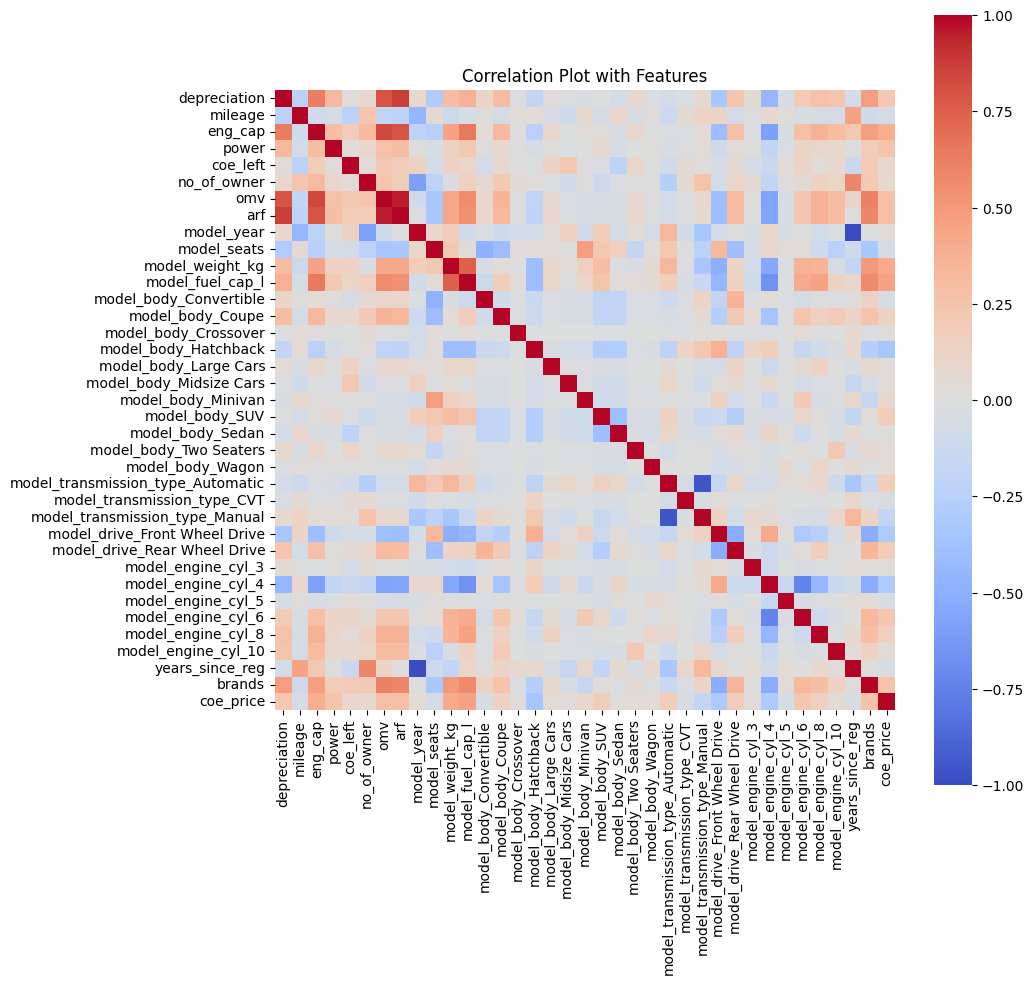

In [408]:
# plotting correlation heatmap between numeric variables
data = data.drop(columns=['model_engine_fuel'])

independent_vars = data.drop(columns=['price'])

correlation = independent_vars.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, cmap="coolwarm")
plt.title("Correlation Plot with Features")

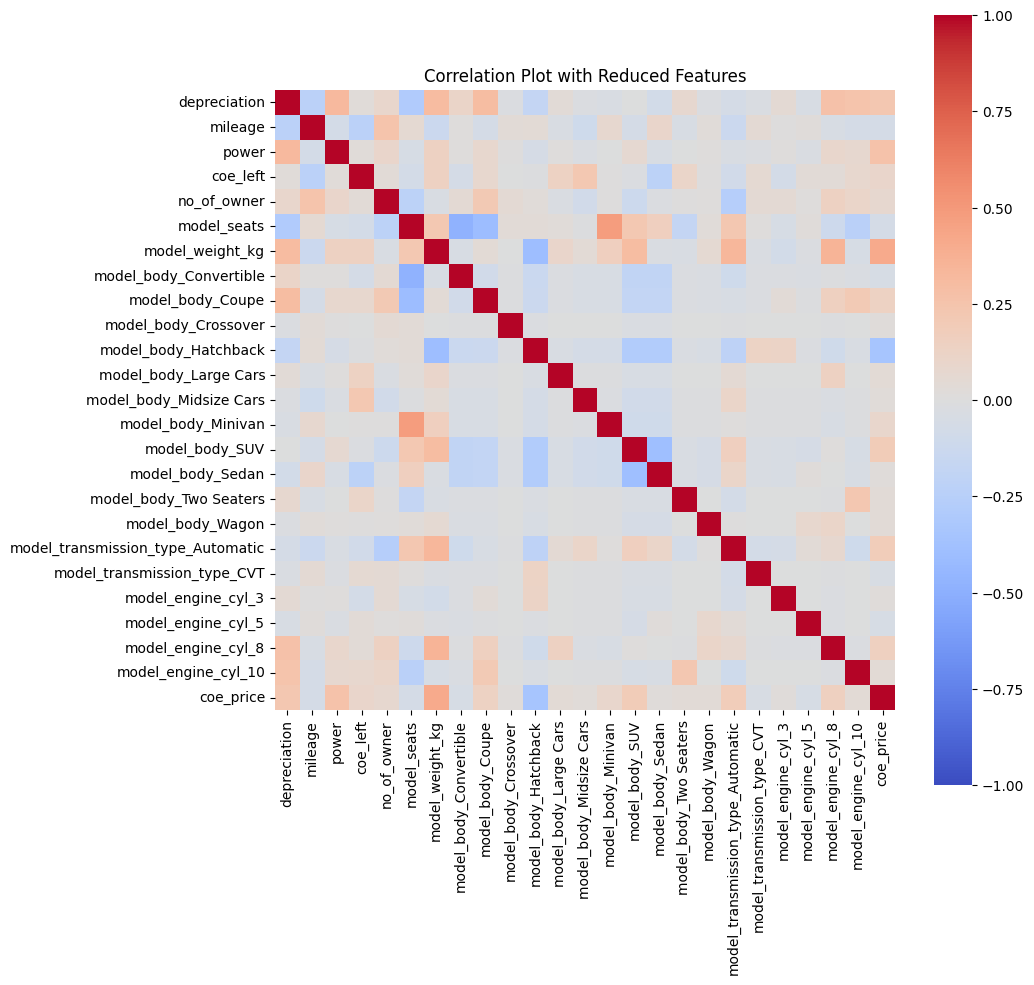

In [409]:
#identify pairs of highly correlated features
threshold = 0.5
upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))

# find columns with correlation greater than the threshold
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

# remove these columns from the DataFrame
independent_vars = independent_vars.drop(columns=to_drop)

# calculate the corr again
corr_reduced = independent_vars.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_reduced, vmax=1, vmin=-1, square=True, cmap="coolwarm")
plt.title('Correlation Plot with Reduced Features')
plt.show()

In [452]:
# # after combining do PCA
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# pca = PCA()
Y = np.log10(data['price'])
# X_pca = pca.fit_transform(independent_vars)


# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.show()


choose 4 components since the curve looks like it flattens out at 4 components

In [453]:
# pca = PCA(n_components=3)
# X_pca = pca.fit_transform(independent_vars)

In [454]:
# split the data up for testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(independent_vars, Y, test_size=0.2, random_state=42)

In [455]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [456]:
# evauate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MAE: 0.06543257587746094
MSE: 0.008544812423430255
RMSE: 0.09243815458689261
R^2: 0.8844007759946677


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


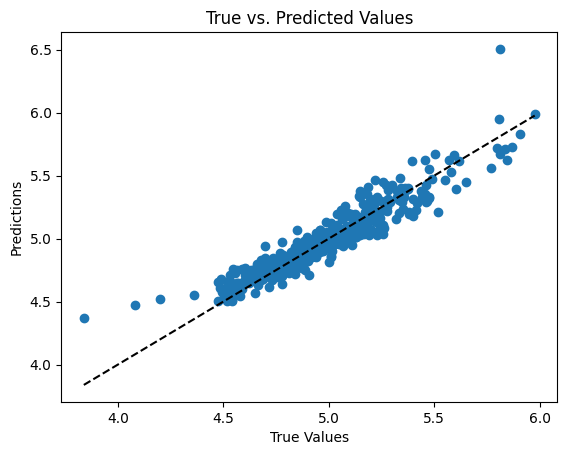

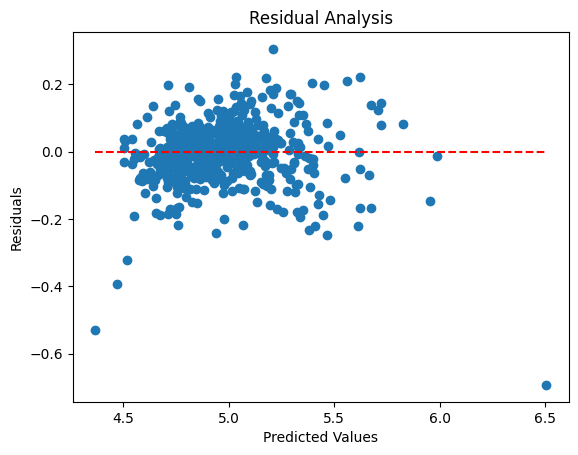

In [457]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

In [464]:
# test back on the dataset
x = independent_vars

predicted_price = model.predict(x)

data['predicted_price'] = np.power(10, predicted_price)

In [465]:
data

,price,depreciation,mileage,eng_cap,power,coe_left,no_of_owner,omv,arf,model_year,model_seats,model_weight_kg,model_fuel_cap_l,model_body_Convertible,model_body_Coupe,model_body_Crossover,model_body_Hatchback,model_body_Large Cars,model_body_Midsize Cars,model_body_Minivan,model_body_SUV,model_body_Sedan,model_body_Two Seaters,model_body_Wagon,model_transmission_type_Automatic,model_transmission_type_CVT,model_transmission_type_Manual,model_drive_Front Wheel Drive,model_drive_Rear Wheel Drive,model_engine_cyl_3,model_engine_cyl_4,model_engine_cyl_5,model_engine_cyl_6,model_engine_cyl_8,model_engine_cyl_10,years_since_reg,brands,coe_price,predicted_price
0,41800,17710,139080,1998,177,0.85,1,17994,17994,2016,5,1643.54,60.18,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,8,1,98062,49097.886231
1,88800,17300,95000,1798,100,4.43,2,30006,24009,2018,4,1530.61,42.77,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,6,1,98062,88687.261774
2,65800,16820,73888,2360,123,3.30,1,20233,20327,2017,5,1375.06,62.83,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,True,False,False,False,False,7,1,98062,67329.735028
3,245000,49900,83600,2995,243,3.06,2,113251,175852,2017,4,1849.89,89.70,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,7,3,98062,153323.962830
4,164999,30600,68000,1991,180,3.82,3,69047,96285,2018,5,1879.82,79.86,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,6,2,98062,116793.023801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,498164,89302,30000,3993,3880,3.80,2,193920,321056,2018,4,2494.78,90.84,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,6,3,98062,540478.274653
2796,238800,51937,100000,1984,1850,3.80,3,63495,86291,2017,5,1769.61,74.94,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,7,3,98062,156200.643763
2797,230788,44806,35000,5038,3310,4.30,3,56753,74156,2018,4,1680.73,58.67,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,6,1,98062,166124.572422
2798,378800,147614,45000,3800,2830,1.90,3,120545,188981,2016,2,1309.75,63.97,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,8,3,98062,653324.743729
